In [6]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score
from keras.layers import Input
import keras
from keras.models import Model

In [7]:
#data augmentation 
#increasing 1000 images in each class
import random
import os
from skimage import io
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from skimage.util import random_noise
from skimage.transform import rotate
import cv2
folder_path = 'C:\Users\Dell\Desktop\Minor 2\imgs\imgstr\c9'

num_files_desired = 1000

images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
num_generated_files = 0
image_to_transform=[]
while num_generated_files <= num_files_desired:
    
    image_path = random.choice(images)
    x= cv2.imread(image_path)
    image_to_transform.append(x)
    num_generated_files=num_generated_files+1
    #print(num_generated_files)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-7-f3bdcfde7a56>, line 14)

In [ ]:
#print(type(image_to_transform))
img=np.array(image_to_transform)

In [8]:
import cv2
folder_path='D:\Major Project\imgs\imgs2\c9'
i=0
#new_file_path = '%s/augmented_image_%i.jpg' % (folder_path, num_generated_files)
#print(new_file_path)
# write image to the disk
x=60006
for i in range(1001):
    new_file_path = '%s/img_%s.jpg' % (folder_path,x)
    x=x+1
    sk.io.imsave(new_file_path, img[i])

ImportError: DLL load failed: The specified module could not be found.

In [47]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.4, 
    zoom_range = 0.3,
    horizontal_flip = True,
    ) 
test_datagen = ImageDataGenerator( rescale = 1./255)

In [48]:
train_generator = train_datagen.flow_from_directory(
    'D:\Major Project\imgs\imgstr',
    target_size = (32, 32),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode='categorical'
    )
validation_generator = test_datagen.flow_from_directory(
    'D:\Major Project\imgs\img1',
    target_size = (32, 32),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'categorical'
    )

Found 29807 images belonging to 10 classes.
Found 2627 images belonging to 10 classes.


In [49]:
import cv2
import matplotlib.pyplot as plt
batch_size=32
from keras.callbacks import History 
history = History()

In [50]:
#VGG16
batch_size=32
num_val_samples=17943
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (32, 32, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

history=model.fit_generator(train_generator, samples_per_epoch=17943, nb_epoch=10, 
                    validation_data=validation_generator, nb_val_samples=800)

C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=560, epochs=10, validation_steps=800)`


Epoch 1/10
560/560 [==============================] - 543s 969ms/step - loss: 2.2031 - accuracy: 0.1649 - val_loss: 1.9035 - val_accuracy: 0.3432
Epoch 2/10
560/560 [==============================] - 437s 781ms/step - loss: 1.7782 - accuracy: 0.3347 - val_loss: 1.6195 - val_accuracy: 0.4963
Epoch 3/10
560/560 [==============================] - 343s 612ms/step - loss: 1.5014 - accuracy: 0.4440 - val_loss: 0.9006 - val_accuracy: 0.6005
Epoch 4/10
560/560 [==============================] - 342s 610ms/step - loss: 1.3077 - accuracy: 0.5219 - val_loss: 0.9459 - val_accuracy: 0.7056
Epoch 5/10
560/560 [==============================] - 299s 534ms/step - loss: 1.1752 - accuracy: 0.5806 - val_loss: 0.9303 - val_accuracy: 0.7527
Epoch 6/10
560/560 [==============================] - 327s 583ms/step - loss: 1.0521 - accuracy: 0.6286 - val_loss: 0.9221 - val_accuracy: 0.7453
Epoch 7/10
560/560 [==============================] - 605s 1s/step - loss: 0.9866 - accuracy: 0.6557 - val_loss: 0.4887 - va

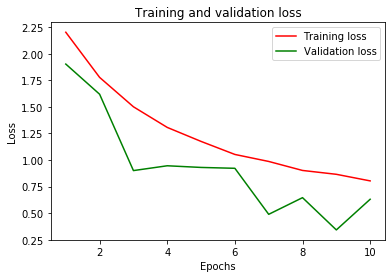

In [51]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

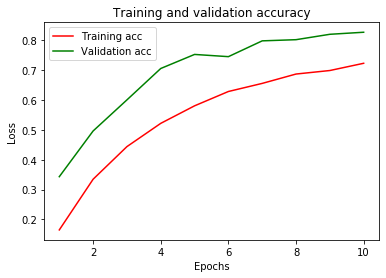

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
model.save('model.h5')
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [56]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [59]:
from keras.preprocessing import image
import numpy as np
from keras.models import Model
from keras.models import load_model
layer_outputs = [layer.output for layer in loaded_model.layers]
activation_model = Model(inputs=loaded_model.input, outputs=layer_outputs)
img51 =image.load_img('D:\Major Project\imgs\img_1394.jpg',target_size = (32,32))
img5 = image.img_to_array(img51)
activations = activation_model.predict(img5.reshape(1,32,32,3))
print(activations)
 


[array([[[[1.63949680e+01, 2.37092781e+01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 6.72015238e+00],
         [5.66232109e+00, 3.15113487e+01, 0.00000000e+00, ...,
          0.00000000e+00, 2.00339365e+00, 1.13225374e+01],
         [2.25428925e+01, 2.53036842e+01, 0.00000000e+00, ...,
          7.80705929e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [6.01101227e+01, 1.02112274e+02, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 4.18741264e+01],
         [4.88314056e+01, 1.28606003e+02, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 4.95883293e+01],
         [3.75774536e+01, 1.58337784e+02, 0.00000000e+00, ...,
          0.00000000e+00, 8.10982990e+00, 3.59553871e+01]],

        [[1.05232124e+01, 2.25164566e+01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 5.55665064e+00],
         [2.34735942e+00, 2.39118233e+01, 0.00000000e+00, ...,
          0.00000000e+00, 5.48556757e+00, 8.76568222e+00],
       

In [60]:
loss= model.evaluate_generator(validation_generator,steps=800)
print("Loss: " + str(loss[0]) + "     Accuracy" + str(loss[1]))

Loss: 0.3447234034538269     Accuracy0.8272228837013245


In [61]:
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
from keras.models import Model
test_image =image.load_img('D:\Major Project\imgs\img_1394.jpg',target_size = (32,32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
classes =loaded_model.predict(test_image)
print (classes)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [63]:
train_generator1 = train_datagen.flow_from_directory(
    'D:\Major Project\imgs\imgstr',
    target_size = (77, 77),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode='categorical',
    
    )
validation_generator1 = train_datagen.flow_from_directory(
    'D:\Major Project\imgs\img1',
    target_size = (77, 77),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'categorical',
    )

Found 29807 images belonging to 10 classes.
Found 2627 images belonging to 10 classes.


In [64]:
#Inception
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.4,
    zoom_range = 0.3,
    horizontal_flip = True,
    validation_split=0.2) 

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator3 = train_datagen.flow_from_directory(
    'D:\Major Project\imgs\imgstr',
    target_size = (32, 32),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode='categorical',
    )
validation_generator3 = test_datagen.flow_from_directory(
      'D:\Major Project\imgs\img1',
    target_size = (32, 32),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'categorical',
    )

input1 = Input(shape = (32, 32, 3))

layer_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input1)
layer_1 = Conv2D(64, (3,3), padding='same', activation='relu')(layer_1)
layer_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input1)
layer_2 = Conv2D(64, (5,5), padding='same', activation='relu')(layer_2)
layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input1)
layer_3 = Conv2D(64, (1,1), padding='same', activation='relu')(layer_3)

output_layer1 = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)
layer_4 = Conv2D(64, (1,1), padding='same', activation='relu')(output_layer1)
layer_4 = Conv2D(64, (3,3), padding='same', activation='relu')(layer_4)
layer_5 = Conv2D(64, (1,1), padding='same', activation='relu')(output_layer1)
layer_5 = Conv2D(64, (3,3), padding='same', activation='relu')(layer_5)
layer_5 = Conv2D(64, (3,3), padding='same', activation='relu')(layer_5)
layer_6 = MaxPooling2D((3,3), strides=(1,1), padding='same')(output_layer1)
layer_6 = Conv2D(64, (1,1), padding='same', activation='relu')(layer_6)

output_layer2 = keras.layers.concatenate([layer_4, layer_5, layer_6], axis = 3)
output = Flatten()(output_layer2)
out    = Dense(10, activation='softmax')(output)

model2 = Model(inputs = input1, outputs = out)

from keras.optimizers import SGD
epochs = 10
alpha = 0.01
decay = alpha/epochs
sgd = SGD(lr=alpha, momentum=0.9, decay=decay, nesterov=False)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=model2.fit_generator(train_generator3, samples_per_epoch=25764, nb_epoch=epochs, 
                    validation_data=validation_generator3, nb_val_samples=800)

Found 29807 images belonging to 10 classes.
Found 2627 images belonging to 10 classes.


C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=805, epochs=10, validation_steps=800)`


Epoch 1/10
805/805 [==============================] - 903s 1s/step - loss: 1.8987 - accuracy: 0.3171 - val_loss: 1.1257 - val_accuracy: 0.5752
Epoch 2/10
805/805 [==============================] - 846s 1s/step - loss: 1.0119 - accuracy: 0.6597 - val_loss: 0.5581 - val_accuracy: 0.8313
Epoch 3/10
805/805 [==============================] - 931s 1s/step - loss: 0.6218 - accuracy: 0.8006 - val_loss: 0.2134 - val_accuracy: 0.8831
Epoch 4/10
805/805 [==============================] - 878s 1s/step - loss: 0.4263 - accuracy: 0.8649 - val_loss: 0.1870 - val_accuracy: 0.9167
Epoch 5/10
805/805 [==============================] - 890s 1s/step - loss: 0.3253 - accuracy: 0.8991 - val_loss: 0.1616 - val_accuracy: 0.9402
Epoch 6/10
805/805 [==============================] - 807s 1s/step - loss: 0.2606 - accuracy: 0.9197 - val_loss: 0.0860 - val_accuracy: 0.9533
Epoch 7/10
805/805 [==============================] - 757s 940ms/step - loss: 0.2238 - accuracy: 0.9309 - val_loss: 0.0858 - val_accuracy: 0.9

In [65]:
model2.save('model2.h5')
model2_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model2_json)
model2.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


In [66]:
from keras.models import model_from_json
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_json)
loaded_model2.load_weights("model2.h5")
print("Loaded model from disk")

Loaded model from disk


In [67]:
img_path = 'D:\Major Project\imgs\img_1394.jpg'
img = image.load_img(img_path, target_size=(32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [68]:
from keras import models
layer_outputs = [layer.output for layer in loaded_model2.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=loaded_model2.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor) 
first_layer_activation = activations[0]

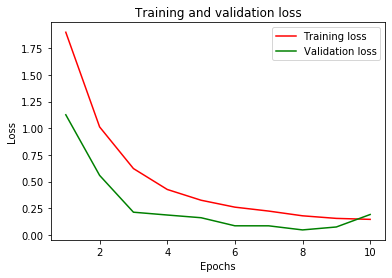

In [69]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

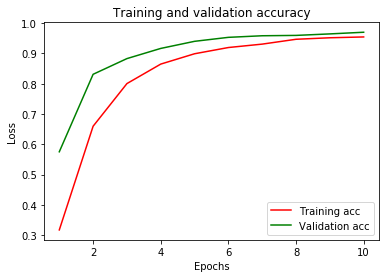

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [71]:
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
from keras.models import Model
test_image =image.load_img('D:\Major Project\imgs\img_1394.jpg',target_size = (32,32))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
classes =loaded_model2.predict(test_image)
print (classes)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [72]:
from keras.optimizers import SGD
epochs=10
alpha = 0.01
decay = alpha/epochs
sgd = SGD(lr=alpha, momentum=0.9, decay=decay, nesterov=False)
loaded_model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
loss=loaded_model2.evaluate_generator(validation_generator3,steps=800)
print("Loss: " + str(loss[0]) + "     Accuracy " + str(loss[1]))

Loss: 0.21141745150089264     Accuracy 0.9704013466835022


In [73]:
#Alexnet
shape = (77,77,3)

classifier = Sequential()

classifier.add(Conv2D(96,(5,5),strides = (2,2),input_shape=shape,activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides =(2,2)))
classifier.add(Conv2D(256,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides =(2,2)))
classifier.add(Conv2D(384,3,3,activation = 'relu'))
classifier.add(Conv2D(384,3,3,activation = 'relu'))
classifier.add(Conv2D(384,3,3,activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides =(2,2)))

classifier.add(Flatten())
classifier.add(Dense(4096, input_shape=shape,activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(1000, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(10, activation = 'softmax'))
classifier.summary()

epochs = 10
alpha = 0.01
decay = alpha/epochs
sgd = SGD(lr=alpha, momentum=0.9, decay=decay, nesterov=True)
classifier.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=classifier.fit_generator(train_generator1, samples_per_epoch=25764, nb_epoch=epochs, 
                    validation_data=validation_generator1, nb_val_samples=800)

C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), activation="relu")`
  if sys.path[0] == '':


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 37, 37, 96)        7296      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 256)       221440    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 2, 2, 384)        

C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=805, epochs=10, validation_steps=800)`


Epoch 1/10
805/805 [==============================] - 1166s 1s/step - loss: 2.3018 - accuracy: 0.1047 - val_loss: 2.2895 - val_accuracy: 0.1307
Epoch 2/10
805/805 [==============================] - 1002s 1s/step - loss: 2.3014 - accuracy: 0.1060 - val_loss: 2.3123 - val_accuracy: 0.1419
Epoch 3/10
805/805 [==============================] - 770s 956ms/step - loss: 2.2868 - accuracy: 0.1289 - val_loss: 2.1387 - val_accuracy: 0.1663
Epoch 4/10
805/805 [==============================] - 735s 913ms/step - loss: 1.9517 - accuracy: 0.2418 - val_loss: 1.6515 - val_accuracy: 0.3676
Epoch 5/10
805/805 [==============================] - 730s 907ms/step - loss: 1.4028 - accuracy: 0.4624 - val_loss: 1.0207 - val_accuracy: 0.5957
Epoch 6/10
805/805 [==============================] - 1085s 1s/step - loss: 0.8765 - accuracy: 0.6865 - val_loss: 0.6147 - val_accuracy: 0.7509
Epoch 7/10
805/805 [==============================] - 1145s 1s/step - loss: 0.5459 - accuracy: 0.8155 - val_loss: 1.1487 - val_acc

In [75]:
classifier.save('classifier.h5')
classifier_json = classifier.to_json()
with open("classifier.json", "w") as json_file:
    json_file.write(classifier_json)
classifier.save_weights("classifier.h5")
print("Saved model to disk")

Saved model to disk


In [76]:
from keras.models import model_from_json
json_file = open('classifier.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_classifier = model_from_json(loaded_model_json)
loaded_classifier.load_weights("classifier.h5")
print("Loaded model from disk")

Loaded model from disk


In [77]:
from keras.preprocessing import image
import numpy as np
from keras.models import Model
from keras.models import load_model
layer_outputs = [layer.output for layer in loaded_classifier.layers]
activation_model = Model(inputs=loaded_classifier.input, outputs=layer_outputs)
img51 =image.load_img('D:\Major Project\imgs\img_1394.jpg',target_size = (77,77))
img5 = image.img_to_array(img51)
activations = activation_model.predict(img5.reshape(1,77,77,3))
print(activations)

[array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 1.9638536e+01, 2.1470084e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 2.1032841e+01, 3.7019608e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 2.1411644e+01, 1.4392365e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 1.3625578e+02, 2.8292648e+01],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 1.3768176e+02, 4.0165821e+01],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 1.3132317e+02, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 2.1883366e+01, 1.7158689e-01],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 2.2960796e+01, 4.2152410e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 

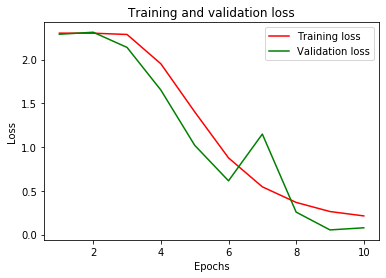

In [78]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

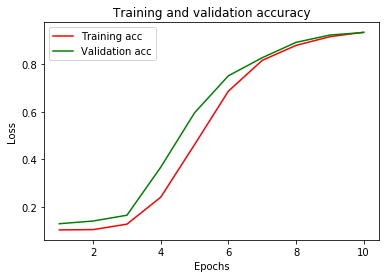

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
from keras.optimizers import SGD
epochs=10
alpha = 0.01
decay = alpha/epochs
sgd = SGD(lr=alpha, momentum=0.9, decay=decay, nesterov=True)
loaded_classifier.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
loss=loaded_classifier.evaluate_generator(validation_generator1,steps=800)
print("Loss: " + str(loss[0]) + "     Accuracy " + str(loss[1]))

Loss: 0.23023590445518494     Accuracy 0.9309759736061096


In [81]:
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
from keras.models import Model
test_image =image.load_img('D:\Major Project\imgs\img_1394.jpg',target_size = (77,77))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
classes =loaded_classifier.predict(test_image)
print (classes)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [82]:
#Inception
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.4,
    zoom_range = 0.3,
    horizontal_flip = True,
    validation_split=0.2) 

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator3 = train_datagen.flow_from_directory(
    'D:\Major Project\imgs\imgstr',
    target_size = (32, 32),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode='categorical',
    subset='training'
    )
validation_generator3 = train_datagen.flow_from_directory(
      'D:\Major Project\imgs\img1',
    target_size = (32, 32),
    color_mode = 'rgb',
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation')

input1 = Input(shape = (32, 32, 3))

layer_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input1)
layer_1 = Conv2D(64, (3,3), padding='same', activation='relu')(layer_1)
layer_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input1)
layer_2 = Conv2D(64, (5,5), padding='same', activation='relu')(layer_2)
layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input1)
layer_3 = Conv2D(64, (1,1), padding='same', activation='relu')(layer_3)

output = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

output = Flatten()(output)
out    = Dense(10, activation='softmax')(output)

model2 = Model(inputs = input1, outputs = out)

from keras.optimizers import SGD
epochs = 10
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit_generator(train_generator3, samples_per_epoch=25764, nb_epoch=epochs, 
                    validation_data=validation_generator3, nb_val_samples=800)

Found 23850 images belonging to 10 classes.
Found 521 images belonging to 10 classes.


C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\Deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=805, epochs=10, validation_steps=800)`


Epoch 1/10
805/805 [==============================] - 543s 675ms/step - loss: 1.8593 - accuracy: 0.3648 - val_loss: 1.2226 - val_accuracy: 0.5720
Epoch 2/10
805/805 [==============================] - 515s 640ms/step - loss: 1.0823 - accuracy: 0.6441 - val_loss: 0.8515 - val_accuracy: 0.6767
Epoch 3/10
805/805 [==============================] - 514s 638ms/step - loss: 0.7899 - accuracy: 0.7413 - val_loss: 0.9754 - val_accuracy: 0.7376
Epoch 4/10
805/805 [==============================] - 515s 640ms/step - loss: 0.6245 - accuracy: 0.7979 - val_loss: 0.8127 - val_accuracy: 0.7984
Epoch 5/10
805/805 [==============================] - 515s 640ms/step - loss: 0.5240 - accuracy: 0.8306 - val_loss: 0.3139 - val_accuracy: 0.8365
Epoch 6/10
805/805 [==============================] - 519s 645ms/step - loss: 0.4422 - accuracy: 0.8592 - val_loss: 0.6997 - val_accuracy: 0.8617
Epoch 7/10
805/805 [==============================] - 518s 644ms/step - loss: 0.3906 - accuracy: 0.8771 - val_loss: 0.7790 -

In [86]:
from keras.models import model_from_json
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_classifier = model_from_json(loaded_model_json)
loaded_classifier.load_weights("model2.h5")
print("Loaded model from disk")

Loaded model from disk


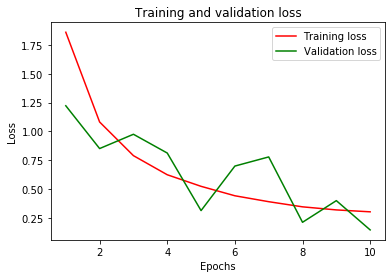

In [87]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

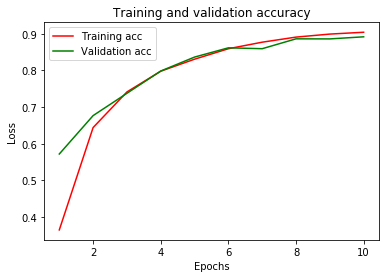

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()